<a href="https://colab.research.google.com/github/RamjiMahadevan3/CVD-Prediction/blob/main/CVD_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,2,140,241,0,1,132,0,1.2,1,0,2,0
6,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
7,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
8,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,54.777778,0.666667,1.111111,132.111111,230.888889,0.222222,0.666667,156.888889,0.222222,1.600000,1.111111,0.444444,2.111111,0.555556
std,9.807877,0.500000,1.054093,9.225568,58.967034,0.440959,0.500000,23.939739,0.440959,1.219631,0.781736,0.726483,0.600925,0.527046
min,37.000000,0.000000,0.000000,120.000000,131.000000,0.000000,0.000000,115.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,56.000000,0.000000,0.000000,130.000000,204.000000,0.000000,0.000000,141.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,236.000000,0.000000,1.000000,163.000000,0.000000,1.200000,1.000000,0.000000,2.000000,1.000000
75%,57.000000,1.000000,2.000000,140.000000,241.000000,0.000000,1.000000,174.000000,0.000000,2.300000,2.000000,1.000000,2.000000,1.000000
max,68.000000,1.000000,3.000000,145.000000,354.000000,1.000000,1.000000,187.000000,1.000000,3.500000,2.000000,2.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.237904,-0.202857,0.409223,-0.078073,0.619801,0.084966,-0.575613,0.128456,-0.104498,-0.012680,0.541891,0.153174,-0.480947
sex,0.237904,1.000000,0.316228,0.442610,-0.429619,0.377964,0.500000,-0.400311,-0.188982,0.573944,-0.533002,0.114708,0.138675,-0.158114
cp,-0.202857,0.316228,1.000000,0.435608,0.096754,0.209165,-0.395285,0.213551,-0.597614,0.243076,-0.623635,-0.562244,-0.811279,0.325000
trestbps,0.409223,0.442610,0.435608,1.000000,-0.386001,0.761345,-0.234855,-0.479318,-0.437005,0.552134,-0.643222,0.364722,-0.070147,-0.399902
chol,-0.078073,-0.429619,0.096754,-0.386001,1.000000,-0.171995,0.083380,0.499138,0.111637,-0.216392,0.217237,-0.497670,-0.493473,0.492930
fbs,0.619801,0.377964,0.209165,0.761345,-0.171995,1.000000,-0.188982,-0.269714,-0.285714,0.581064,-0.443203,0.433555,-0.104828,-0.059761
restecg,0.084966,0.500000,-0.395285,-0.234855,0.083380,-0.188982,1.000000,-0.264553,0.377964,0.225478,0.106600,0.114708,0.554700,-0.158114
thalach,-0.575613,-0.400311,0.213551,-0.479318,0.499138,-0.269714,-0.264553,1.000000,-0.423649,-0.012415,0.127649,-0.406481,-0.442174,0.649458
exang,0.128456,-0.188982,-0.597614,-0.437005,0.111637,-0.285714,0.377964,-0.423649,1.000000,-0.325396,0.282038,0.043355,0.366900,-0.059761
oldpeak,-0.104498,0.573944,0.243076,0.552134,-0.216392,0.581064,0.225478,-0.012415,-0.325396,1.000000,-0.603086,0.225723,0.119388,0.116677


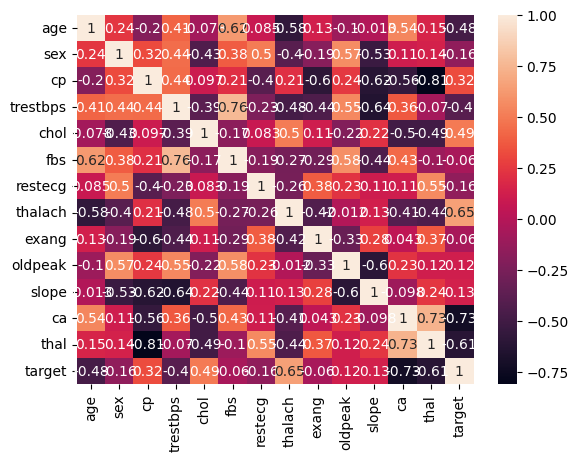

In [7]:
dfplot = sb.heatmap(df.corr(), annot=True)

<Axes: >

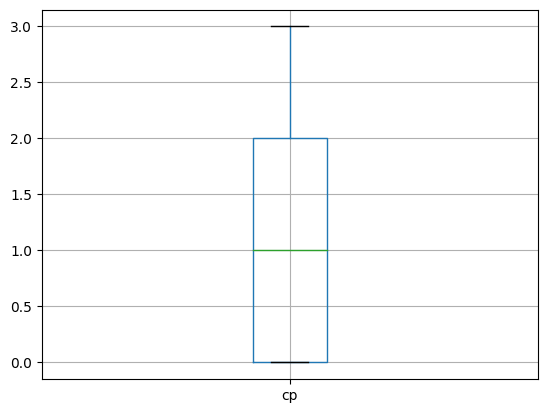

In [8]:
df.boxplot("cp")

<Axes: >

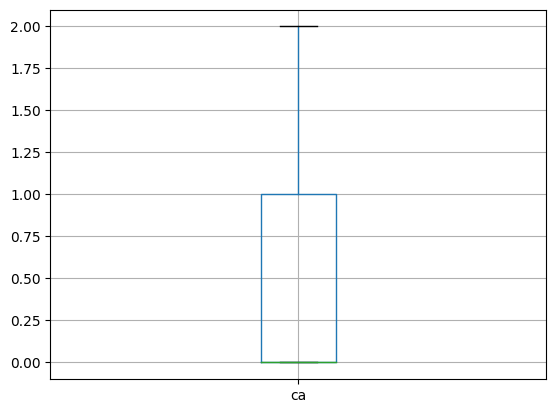

In [9]:
df.boxplot("ca")

In [10]:
df1=df[df['ca']<3]

<Axes: >

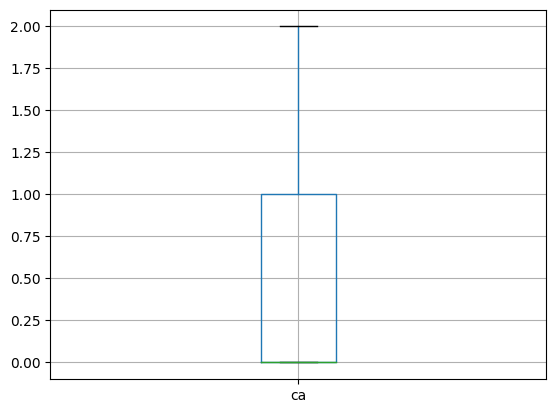

In [11]:
df1.boxplot("ca")

<Axes: >

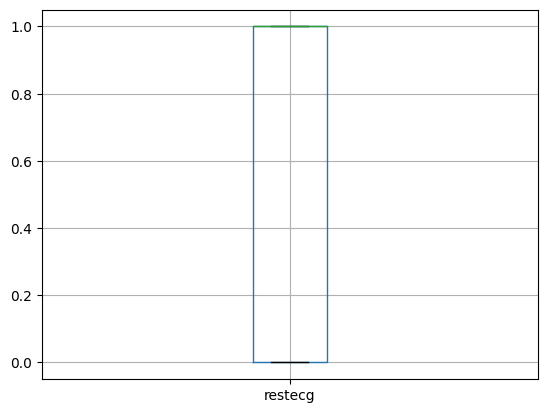

In [12]:
df.boxplot("restecg")

<Axes: >

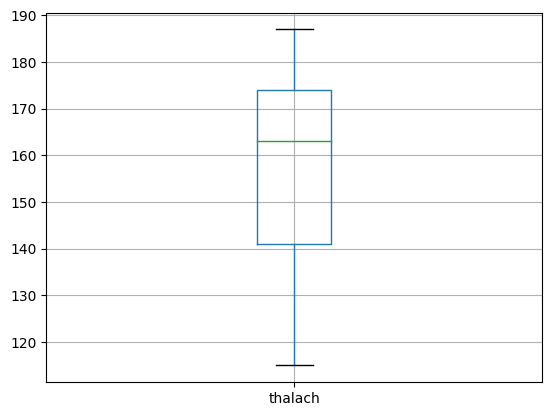

In [13]:
df.boxplot("thalach")

In [14]:
df1=df[df['thalach'] >76 ]

<Axes: >

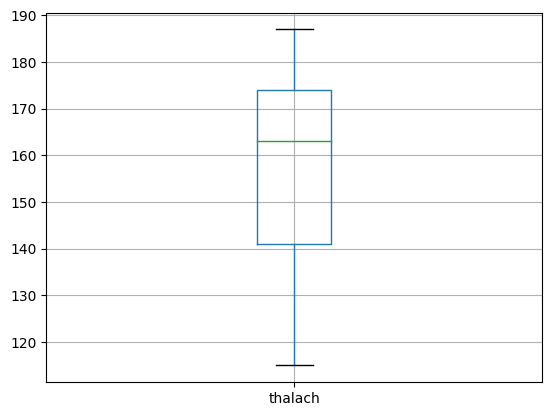

In [15]:
df1.boxplot("thalach")

<Axes: >

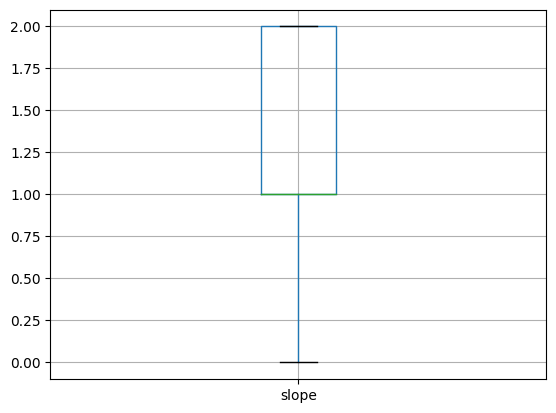

In [16]:
df.boxplot("slope")

<Axes: >

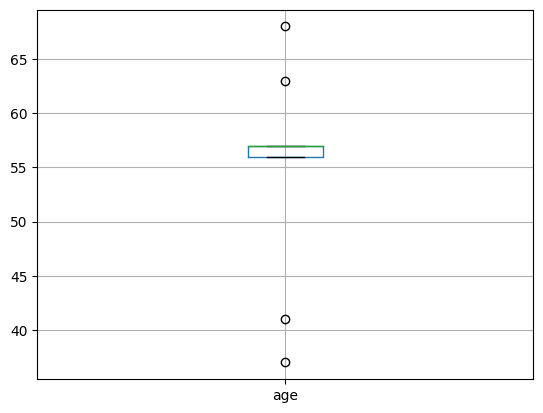

In [17]:
df.boxplot("age")

In [18]:
df1["target"].value_counts()

,count
target,
1,5
0,4


In [19]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [21]:

from sklearn.metrics import classification_report

In [22]:
from xgboost import XGBClassifier

model1 = XGBClassifier(random_state=1)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.ensemble import AdaBoostClassifier
model2=AdaBoostClassifier(random_state=1)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
